### **Exploring the Data**

In analysis we will explore that how covid 19 affected the school and collages in each country and help us to understand its consequenses

**Creating a Dataframe of the Data**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Pallav\\Desktop\\COVID-19 DATASET\\Datasets\\Education.csv')

In [3]:
df.drop(columns = 'Note',inplace=True)

In [4]:
df

,Date,ISO,Country,Status
0,16/02/2020,ABW,Aruba,Fully open
1,16/02/2020,AFG,Afghanistan,Fully open
2,16/02/2020,AGO,Angola,Fully open
3,16/02/2020,AIA,Anguilla,Fully open
4,16/02/2020,ALB,Albania,Fully open
...,...,...,...,...
131035,31/10/2021,WSM,Samoa,Fully open
131036,31/10/2021,YEM,Yemen,Fully open
131037,31/10/2021,ZAF,South Africa,Partially open
131038,31/10/2021,ZMB,Zambia,Fully open


Converting the Date column into Datetime

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Pallav\AppData\Local\Temp\ipykernel_5052\2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Sorting out the Data only for the Days When The Schools Where Fully open

In [6]:
df_fully_open = df[df['Status'] == 'Fully open']

Adding year and month column to make grouping the data more simple

In [7]:
df_fully_open['Month_no'] = df_fully_open['Date'].dt.month
df_fully_open['Year'] = df_fully_open['Date'].dt.year

C:\Users\Pallav\AppData\Local\Temp\ipykernel_5052\3719974359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_open['Month_no'] = df_fully_open['Date'].dt.month
C:\Users\Pallav\AppData\Local\Temp\ipykernel_5052\3719974359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fully_open['Year'] = df_fully_open['Date'].dt.year


Sorting the Data for Year 2020

In [11]:
df_fully_open_2020 = df_fully_open[df_fully_open['Year'] == 2020]

In [15]:
df_fully_open_2020['Date'].value_counts()

Date
2020-02-16    207
2020-02-20    207
2020-02-17    207
2020-02-18    207
2020-02-19    207
             ... 
2020-04-13      5
2020-04-02      5
2020-04-12      4
2020-04-11      4
2020-04-10      4
Name: count, Length: 320, dtype: int64

In [18]:
df_pivot_table = df_fully_open_2020.pivot_table(index = 'Country',columns = 'Month_no',values = 'Status',aggfunc='size')

In [21]:
df_pivot_table = df_pivot_table.fillna(0)

Sorting the Data only for the 8 countries

In [26]:
selected_country = ['Brazil','Mexico', 'Italy', 'France', 'Germany', 'Colombia', 'Argentina','India','China']

In [27]:
subset = df_pivot_table.loc[selected_country]

Text(0.5, 0.98, 'Number of Days Institues were Fully open in Year 2020')

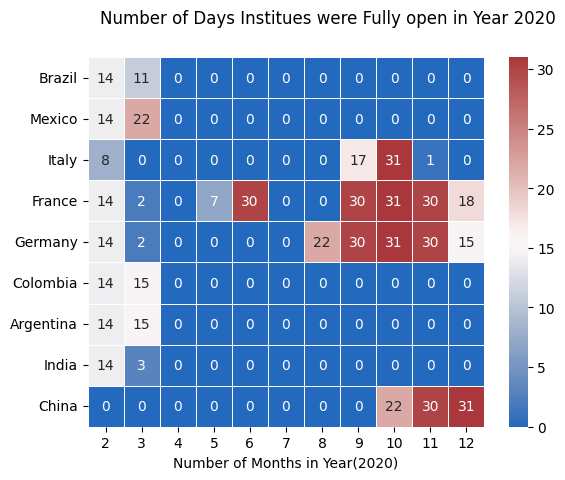

In [41]:
sns.heatmap(subset,annot = True,linewidths=.5,cmap = 'vlag')
plt.xlabel('Number of Months in Year(2020)')
plt.ylabel('')
plt.suptitle("Number of Days Institues were Fully open in Year 2020")



The final result—the heatmap you provided—shows the **number of days schools were fully open in each month of 2020 for selected countries**. 

### Key Insights from the Heatmap

- **Consistent Closures:** Most countries display almost no fully open days from April onwards, reflecting widespread and prolonged school closures due to COVID-19, especially from April to December.
- **Partial Openings:** Early months (February, March) for several countries (Brazil, Mexico) show some days with schools fully open, but this drops to zero or near zero subsequently.
- **Diverse Recovery Patterns:** 
  - **Italy, France, Germany, China:** Show clusters where schools became fully open again, typically in the last quarter—suggesting phased or late reopening.
  - **China:** Notably, most fully open days only appear from October through December, aligning with its pandemic trajectory.
- **Hemispheric/Regional Differences:** Countries like Colombia, Argentina, and India also show limited reopenings, but usually much later or for short periods, if at all.
- **No Full Opening:** Some countries (e.g., Argentina, India, Colombia) have virtually no months where schools were fully open for the entire month in 2020.

### How to Interpret

- **Darkest blue (low values, near zero):** Long closures or no fully open days.
- **Dark red (high values):** Full or near-full reopening for long stretches.

### What the Heatmap Tells Us

The heatmap provides a **clear timeline of school reopening patterns** during the COVID-19 pandemic. Most countries experienced extended school closures with sparse reopening periods—often concentrated toward the year’s end or very brief intervals. The pattern supports the global narrative of sustained educational disruption in 2020.
